# #Author: Ayush Kakar


# Red Wine Quality Prediction Using KNN



# Importing the necessary libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sns.set()
%matplotlib inline


# Reading the Dataset

In [21]:

data = pd.read_csv("winequality-red.csv")

In [55]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2


# Checking the unique values in the "quality" column helps me to get an idea about how many classifications there are and hence, the model for prediction is appropriately chosen

In [5]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:

data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Cleaning and formatting the dataset

In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis (EDA)

# Volatile Acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

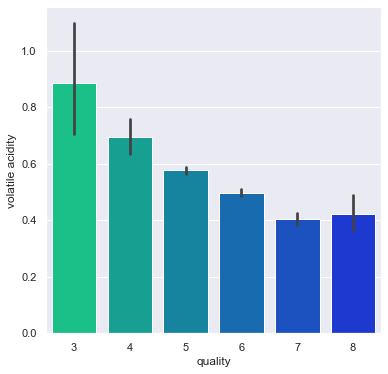

In [9]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "volatile acidity", data = data, palette = "winter_r")

# Citric Acid

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

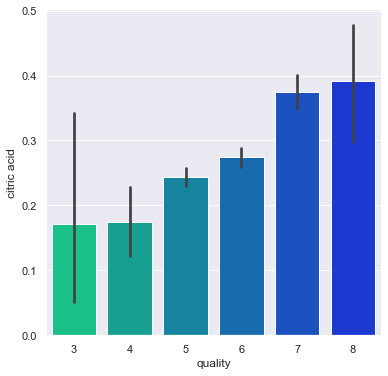

In [10]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "citric acid", data = data, palette = "winter_r")

# Sulfur Dioxide

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

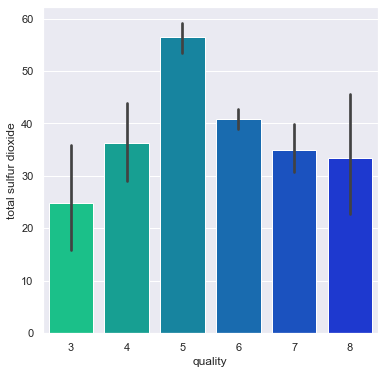

In [11]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "total sulfur dioxide", data = data, palette = "winter_r")

# pH

<AxesSubplot:xlabel='quality', ylabel='pH'>

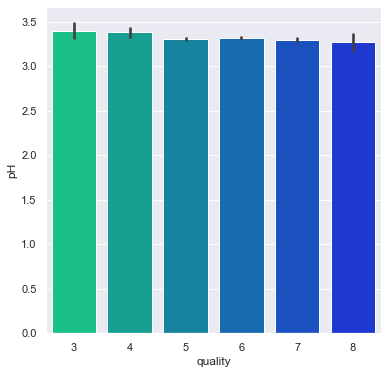

In [12]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "pH", data = data, palette = "winter_r")


# Alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

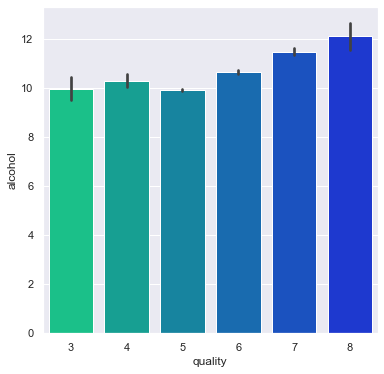

In [13]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "alcohol", data = data, palette = "winter_r")

# CORRELATION HEATMAP

<AxesSubplot:>

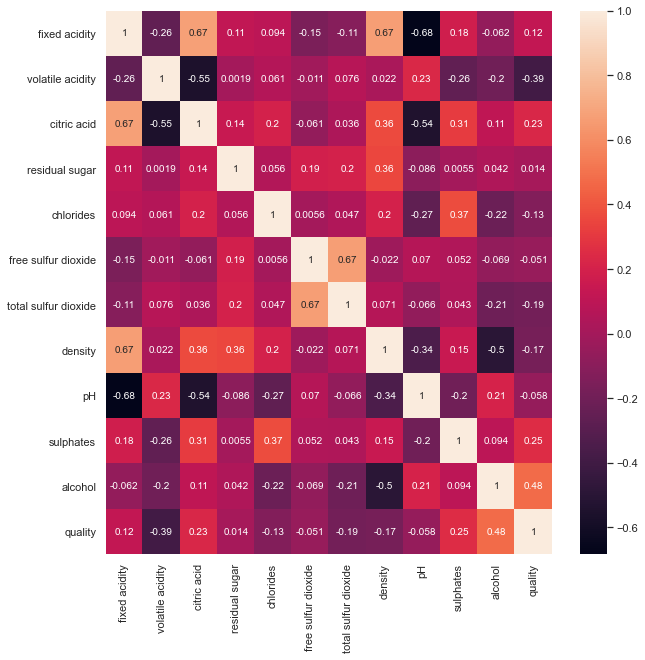

In [15]:
correlation = data.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation,annot = True)

# Preprocessing

In [24]:
reviews = []
for i in data['quality']:
    
    if i >=1 and i<= 3:
        
        reviews.append('1')
        
    elif i >=4 and i<=7:
        
        reviews.append('2')
        
    elif i>=8 and i<=10:
        
        reviews.append('3')
data['Reviews'] = reviews

# For further preprocessing operations, the predictor variables and the response variables are stored in two different variables
# Note that our new response variable shall be reviews

In [25]:
predictor_variables = data.iloc[:,:11]
response_variables = data.Reviews

# SCALING

In [28]:

scaler = StandardScaler()
scaled_variables = scaler.fit_transform(predictor_variables)

# DIMENSIONALITY REDUCTION

In [29]:

pca = PCA()
x_pca = pca.fit_transform(scaled_variables)

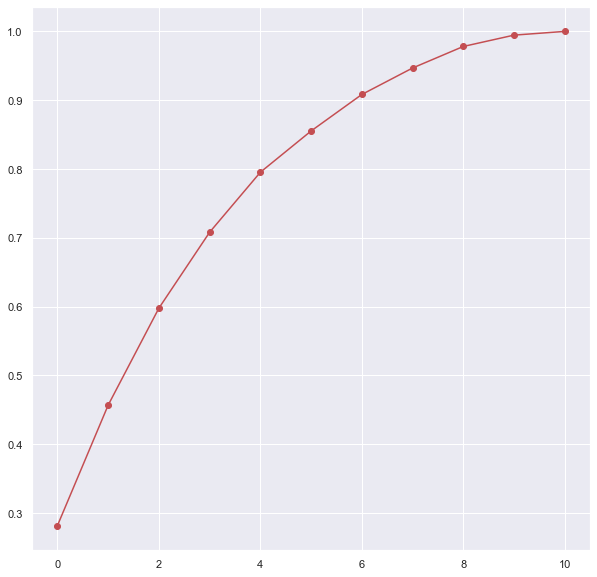

In [30]:
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-ro')
plt.grid(True)

In [31]:

pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(scaled_variables)

# Quality column of dataset

In [38]:
y = data["quality"]
# target_names = ["negative", "positive"]

In [39]:
X = data.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


# Splitting the data into test and train

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Testing Accuracy

k: 1, Train/Test Score: 1.000/0.520
k: 3, Train/Test Score: 0.736/0.440
k: 5, Train/Test Score: 0.670/0.468
k: 7, Train/Test Score: 0.620/0.475
k: 9, Train/Test Score: 0.596/0.475
k: 11, Train/Test Score: 0.588/0.458
k: 13, Train/Test Score: 0.583/0.458
k: 15, Train/Test Score: 0.573/0.468
k: 17, Train/Test Score: 0.568/0.480
k: 19, Train/Test Score: 0.571/0.482


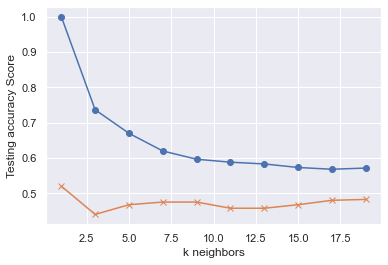

In [41]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.475


# Prediction on the quality column

In [48]:

data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [50]:
data['quality'] = np.where(data['quality'] > 6, 1, 0)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [52]:
#Assigning dataframe to list of array values
X = data.drop(['quality'], axis = 1).values
y = data['quality'].values

In [53]:
#Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

# Measure Performance using KNN

In [54]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.9020833333333333 Best K-Score 3
